In [1]:
# Dependencies
import pandas as pd
%matplotlib notebook 
import matplotlib.pyplot as plt

In [9]:
# Import Energy and community area per capita income csv files

# Energy csv import
energy_file = "Electricity_Only_some_Housing.csv"
electricity_df = pd.read_csv(energy_file)

# Check energy_df
electricity_df.drop(columns='Unnamed: 0', inplace=True)
electricity_df.head()

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,...,KWH 1ST QUARTILE 2010,KWH 2ND QUARTILE 2010,KWH 3RD QUARTILE 2010,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS,TOTAL POPULATION
0,Archer Heights,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.87,23.0,0.9582,9.0,0.3910,23.0,89.0
1,Ashburn,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,...,8886.0,21363.0,51815.0,1.81,62.0,0.9254,50.0,0.8059,62.0,112.0
2,Auburn Gresham,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.00,34.0,0.7082,23.0,0.6759,34.0,102.0
3,Austin,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.95,41.0,0.7321,32.0,0.7800,41.0,121.0
4,Austin,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.26,19.0,0.8261,11.0,0.5790,19.0,62.0


count      77.000000
mean      870.792208
std       583.921528
min        61.000000
25%       395.000000
50%       827.000000
75%      1154.000000
max      2869.000000
Name: COMMUNITY AREA NAME, dtype: float64
The range of number electricity energy readings from each neighborhood is
61 to 2869.


<IPython.core.display.Javascript object>


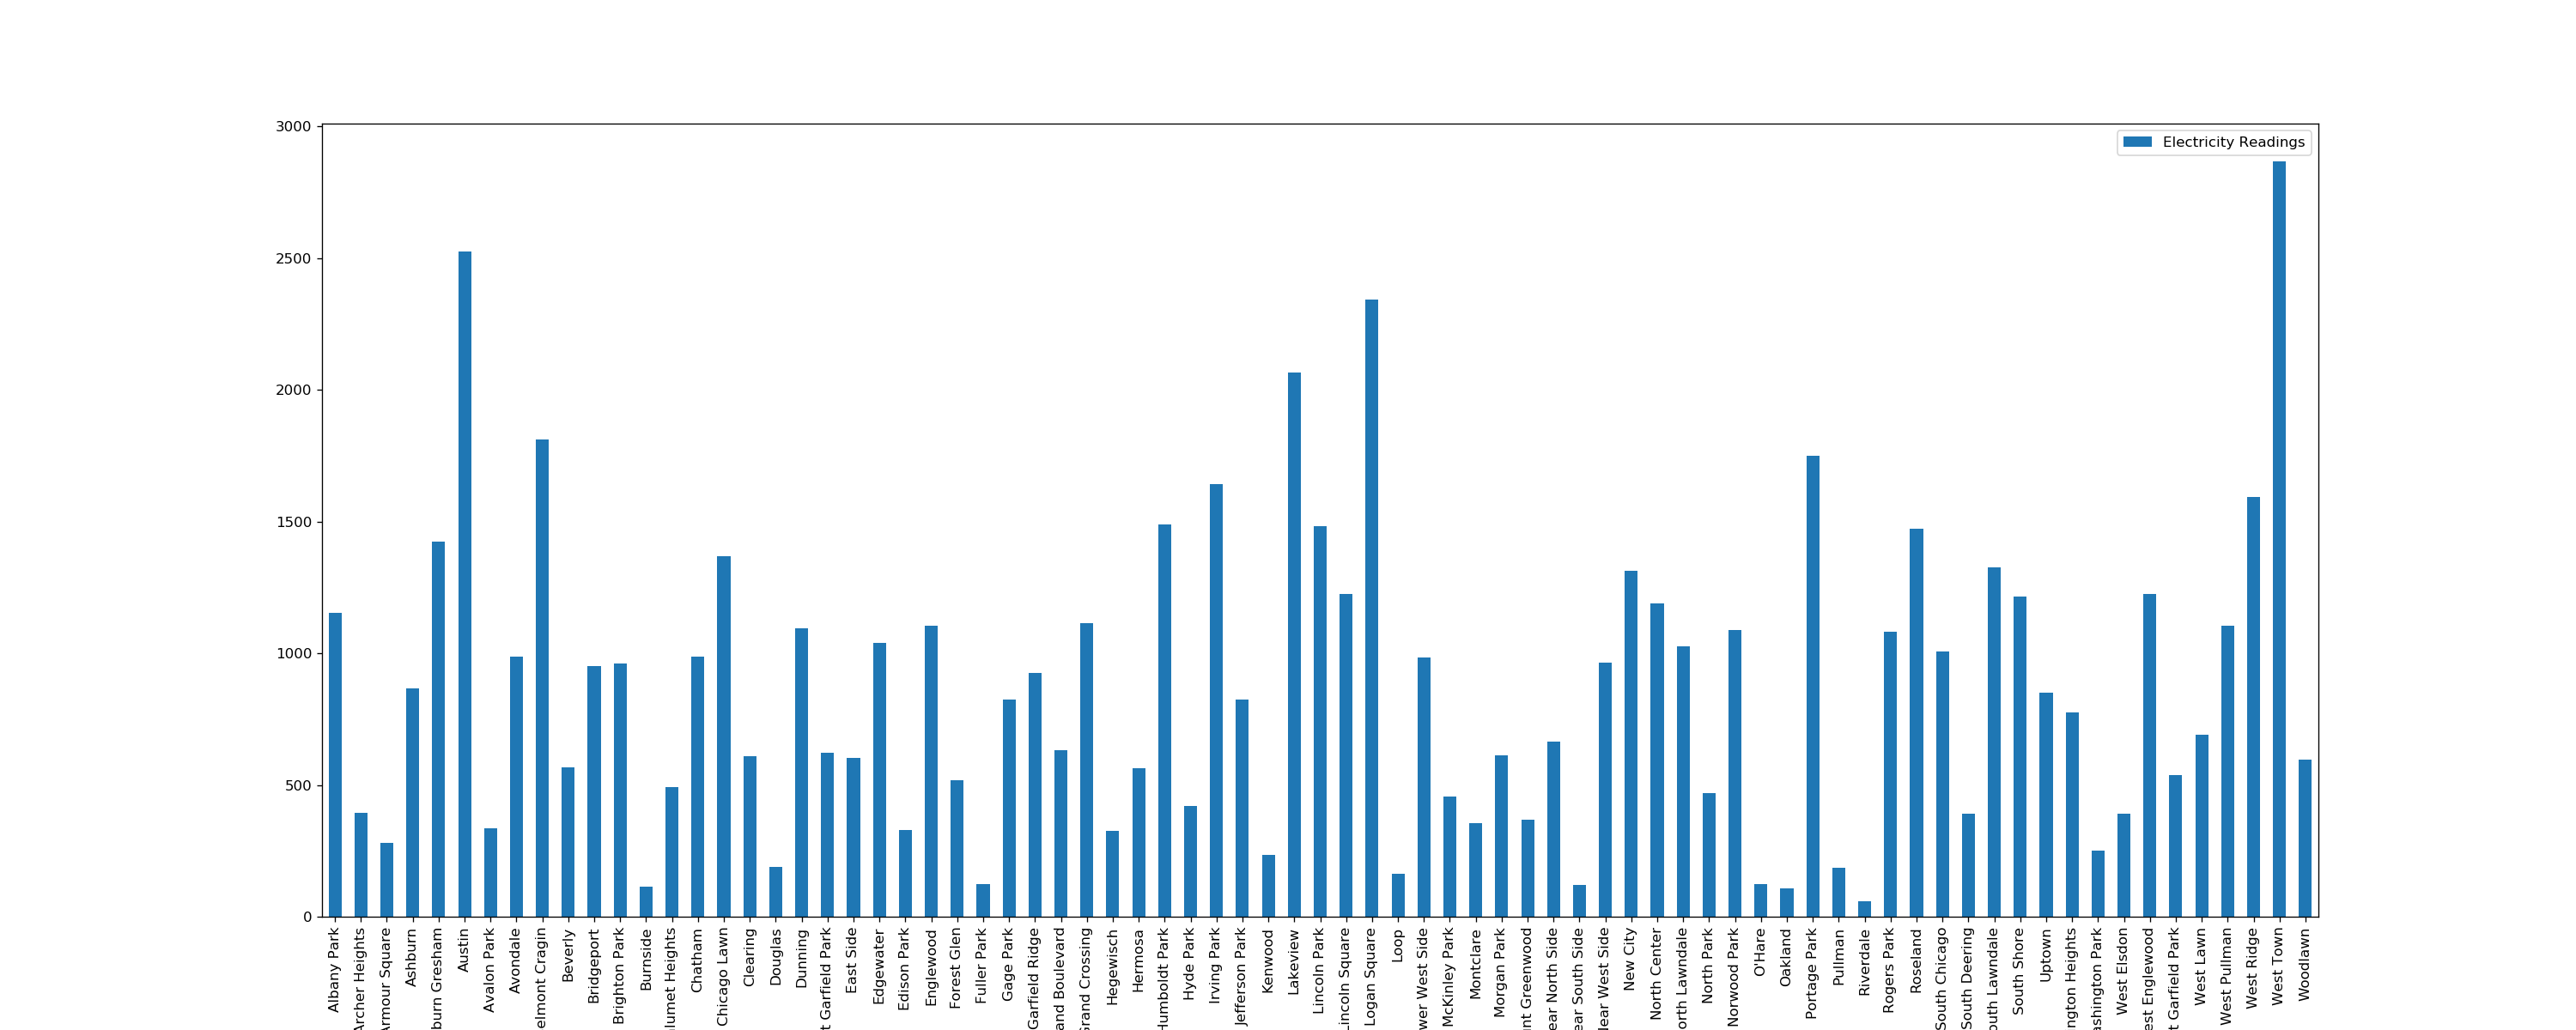

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [10]:
# Count of energy readings from each neighborhood (residential and commercial)
electricity_areas_min = electricity_df['COMMUNITY AREA NAME'].value_counts().min()
electricity_areas_max = electricity_df['COMMUNITY AREA NAME'].value_counts().max()
electricity_areas_summ = electricity_df['COMMUNITY AREA NAME'].value_counts().describe()
electricity_areas_count = electricity_df['COMMUNITY AREA NAME'].value_counts()

print(electricity_areas_summ)
print(f"The range of number electricity energy readings from each neighborhood is")
print(f"{electricity_areas_min} to {electricity_areas_max}.")

plot_electricity = electricity_df.groupby('COMMUNITY AREA NAME').count()
plot_electricity = plot_electricity[['BUILDING TYPE']]

plot_electricity.rename(columns={'BUILDING TYPE': 'Electricity Readings'}, inplace=True)

plot_electricity.plot(kind='bar', figsize=(25,10))
plt.show()
plt.tight_layout

In [11]:
# Clean up electricity_df
# Drop commercial building types

residential_electricity = electricity_df.set_index('BUILDING TYPE')
residential_electricity.drop(index="Commercial", inplace=True)

# Record new length of residential_electricity DataFrame 
len(residential_electricity)

49866

In [12]:
# Continue cleaning electricity data
# Reset index of residential_electricity
residential_electricity.reset_index(inplace=True)

# Check residential_electricity
residential_electricity.head()

,BUILDING TYPE,COMMUNITY AREA NAME,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,...,KWH 1ST QUARTILE 2010,KWH 2ND QUARTILE 2010,KWH 3RD QUARTILE 2010,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS,TOTAL POPULATION
0,Residential,Archer Heights,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.87,23.0,0.9582,9.0,0.3910,23.0,89.0
1,Residential,Ashburn,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,...,8886.0,21363.0,51815.0,1.81,62.0,0.9254,50.0,0.8059,62.0,112.0
2,Residential,Austin,Multi 7+,2461.0,4888.0,2893.0,2737.0,2350.0,3037.0,3874.0,...,41497.0,41497.0,41497.0,2.93,27.0,0.8710,27.0,1.0000,27.0,79.0
3,Residential,Austin,Multi 7+,0.0,0.0,0.0,0.0,0.0,511.0,904.0,...,8596.0,8596.0,8596.0,3.82,22.0,0.6667,16.0,0.7270,22.0,84.0
4,Residential,Austin,Multi < 7,96.0,202.0,1837.0,1118.0,669.0,889.0,812.0,...,1344.0,4051.0,6134.0,0.00,0.0,NaN,0.0,NaN,0.0,0.0


count      77.000000
mean      647.610390
std       431.239558
min         6.000000
25%       320.000000
50%       640.000000
75%       882.000000
max      1977.000000
Name: COMMUNITY AREA NAME, dtype: float64
The range of number electricity energy readings from each neighborhood is
6 to 1977.


<IPython.core.display.Javascript object>


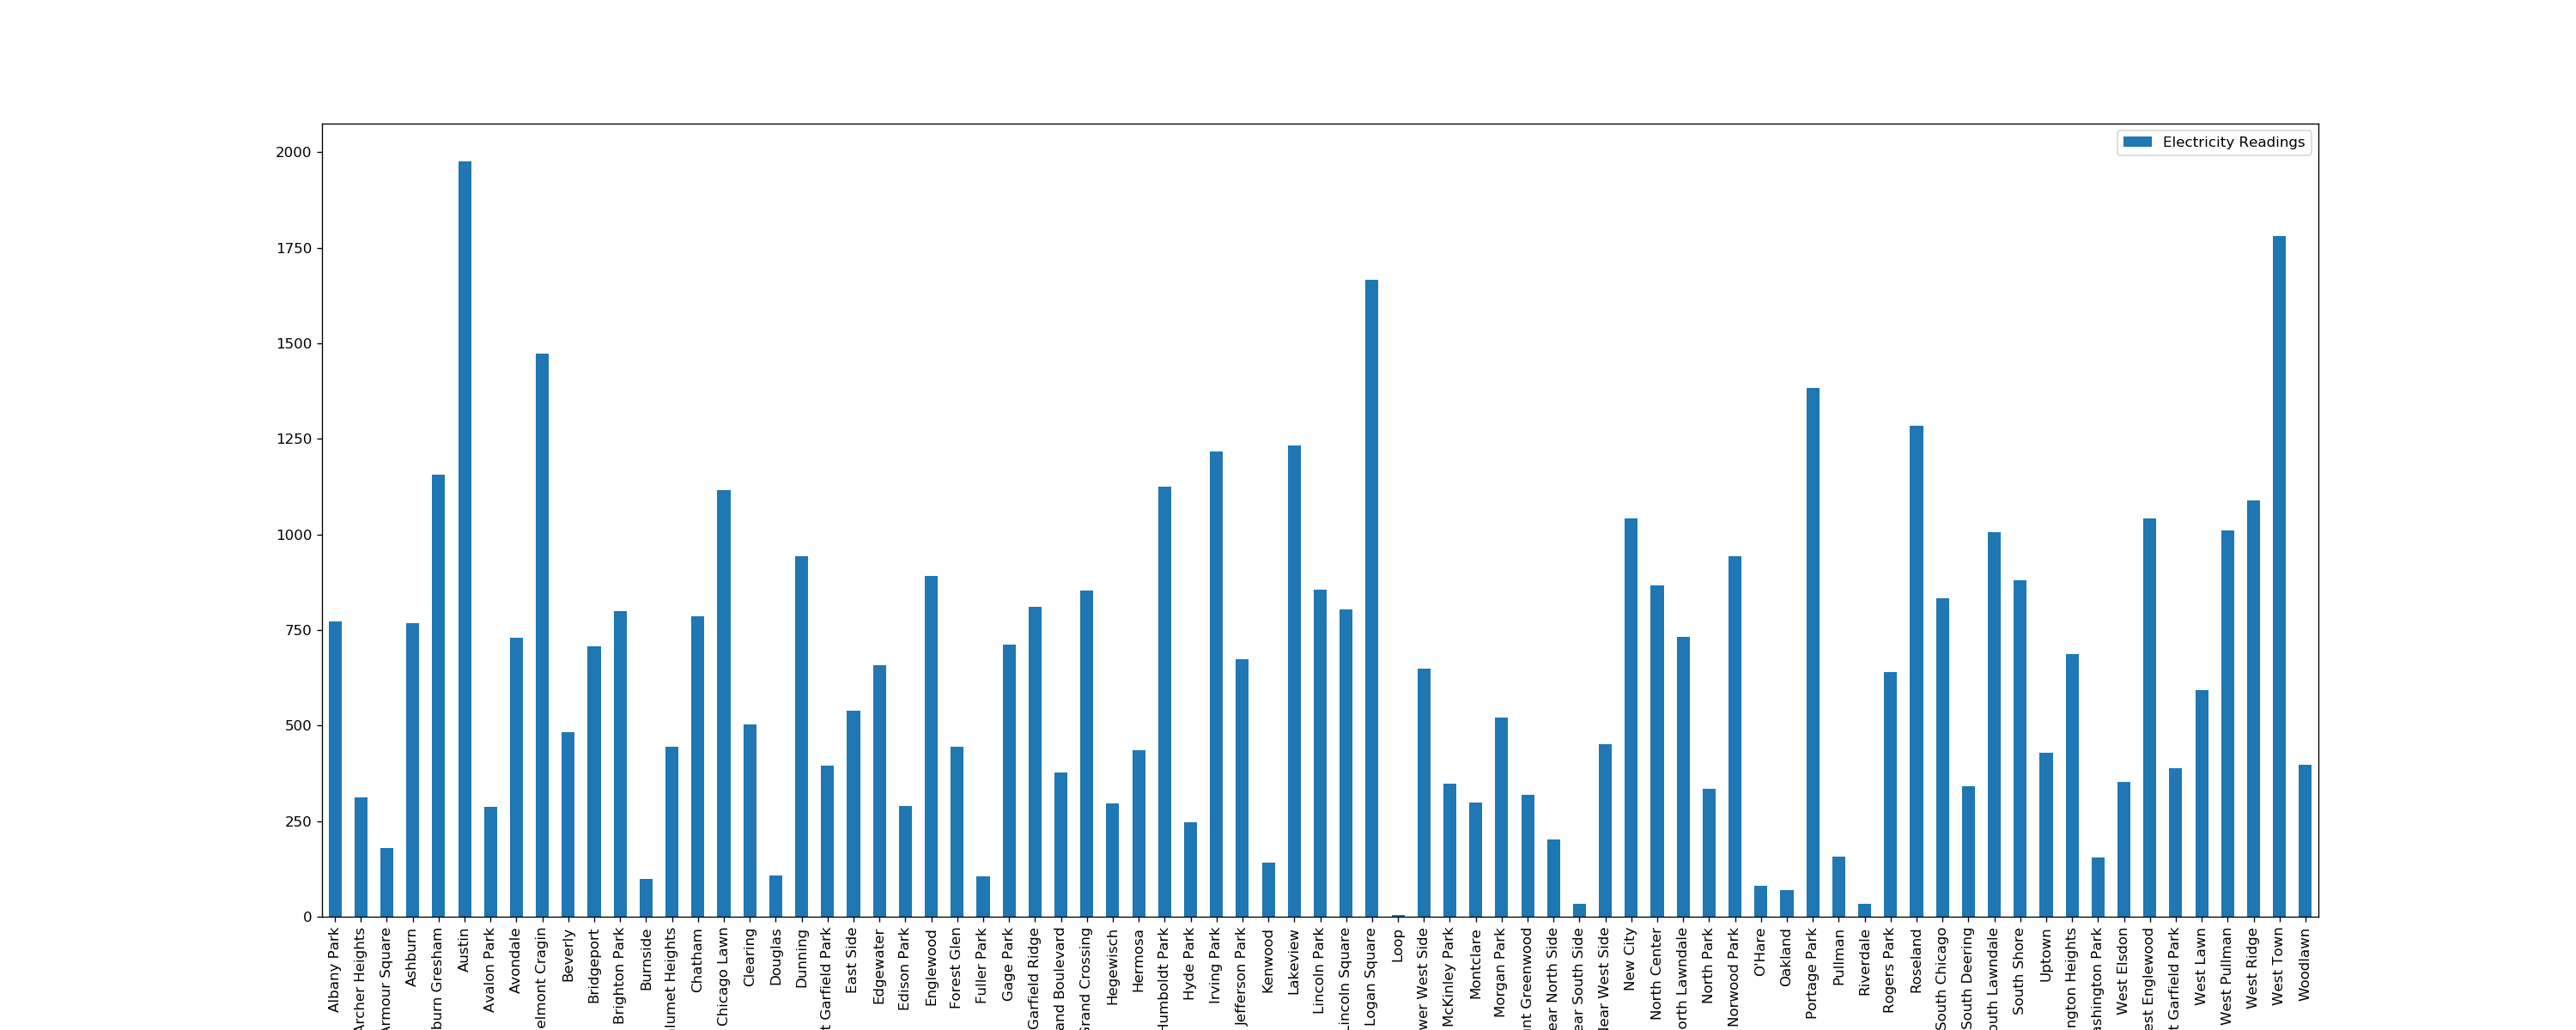

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [13]:
# Count of energy readings from each neighborhood (residential and commercial)
res_elec_areas_min = residential_electricity['COMMUNITY AREA NAME'].value_counts().min()
res_elec_areas_max = residential_electricity['COMMUNITY AREA NAME'].value_counts().max()
res_elec_areas_summ = residential_electricity['COMMUNITY AREA NAME'].value_counts().describe()
res_elec_areas_count = residential_electricity['COMMUNITY AREA NAME'].value_counts()

print(res_elec_areas_summ)
print(f"The range of number electricity energy readings from each neighborhood is")
print(f"{res_elec_areas_min} to {res_elec_areas_max}.")

plot_res_elec = residential_electricity.groupby('COMMUNITY AREA NAME').count()
plot_res_elec = plot_res_elec[['BUILDING TYPE']]
plot_res_elec.rename(columns={'BUILDING TYPE': 'Electricity Readings'}, inplace=True)

plot_res_elec.plot(kind='bar', figsize=(25,10))
plt.show()
plt.tight_layout